# In-class exercise 1

Now that you have some experience with exploring your data and visualizing it, it's time for you to combine and apply your knowledge. 

In each challenge, you are asked to provide the programing solution to it as well as a technical interpretation explaining the steps taken and the result.

## Dataset

In this exercise, we work with data on U.S. partisan news pages on Facebook. These data were collected and analyzed by Silverman et al. (2017) for this article published on BuzzFeed [Inside The Partisan Fight For Your News Feed](https://www.buzzfeednews.com/article/craigsilverman/inside-the-partisan-fight-for-your-news-feed). The file you will work with is created based on the data available in this [GitHub repository](https://github.com/BuzzFeedNews/2017-08-partisan-sites-and-facebook-pages). 

In their investigation, the authors created a list of 667 partisan news websites. The websites were added to the list manually by two journalists who were dedicated to identifying partisan news websites. Once a website was added, its associated Facebook page was identified. This was possible for 452 websites. Information on these Facebook pages was collected using the Facebook API. Next, the websites were classified as left- or right-leaning based on a manual review of the content published by the website and its Facebook page, and by examining their About pages for mentions of partisanship. In datasets you will use, you can find information on the Facebook pages, their political leaning as well as information on enagagement. 

In the exercise you will use the following files:
- `pages-info.csv` - dataset about the identified Facebook pages. It contains the following information:
    - page_name:  name of the page on Facebook
    - about: description of the page
    - fan_count: number of fans
    - talking_about_count: number of people sharing stories about the page
    - website: name of the website related to the page
    - page_id: ID of the Facebook page
    - year: year when the page was created
    - left_leaning: political left leaning of the page (takes value 1 for pages identified as left leaning and 0 for others)
    - left_leaning: political right leaning of the page (takes value 1 for pages identified as right leaning and 0 for others)
- `engagement_weekly.csv` - dataset about engagement with the identified pages in the last week before 2016 US presidential electiosn. It contains the following information:
    - page_id: ID of the Facebook page
    - status_published: the period for which engagement was measures (in this case, it is the first week of November 2016 for all pages).
    - total_engagement: total number of engagement with the page in the week
    - num_reactions: total number of reactions posts by the page recieved in the week (including all possible Facebook reactions)
    - num_comments: total number of comments posts by the page recieved in the week
    - num_shares: total number of times posts by the page have been shared in the week
    - num_likes: total number of likes posts by the page recieved in the week
    - num_loves: total number of 'love' reactions posts by the page recieved in the week
    - num_wows: total number of 'wow' reactions posts by the page recieved in the week
    - num_hahas: total number of 'haha' reactions posts by the page recieved in the week
    - num_sads: total number of 'sad' reactions posts by the page recieved in the week
    - num_angrys: total number of 'angry' reactions posts by the page recieved in the week
    - post_count: total numer of posts posted in the week

# Question 1.1 

Let's start with preparing and exploring the datasets. 

1) Explore the dataset and the necessary variables. <br /> *Make sure to at least check how the dataset looks like, what columns it has, what data type these columns have. <br />Tip: have a look at week 4 for pandas commands useful for exploration.*  

For each question, provide the necessary code and a short explanation of the choices you made.

In [31]:
# it is good practice to import everything you'll need in one script at the start

import pandas as pd
import seaborn as sns

In [6]:
# read in the data as pandas so that we get a dataframe
pages = pd.read_csv("pages-info.csv", delimiter = ",")
pages.head()

,Unnamed: 0,page_name,about,fan_count,talking_about_count,website,page_id,year,month,day,left_leaning,right_leaning
0,0,Americans Against the Tea Party,We are your go to source for political news.,583256,43343,http://www.aattp.org,108038612554992,2009.0,4.0,3.0,1,0
1,1,act.tv,Rise up and Resist! Your home for movement-ori...,285075,481748,http://act.tv,153418591515382,NaN,NaN,NaN,1,0
2,2,New Blue United,NaN,1476093,93116,www.bluetribune.com,188464111175168,NaN,NaN,NaN,1,0
3,3,Obama is the Worst President in US History,NaN,1569590,41452,NaN,296856040436954,2013.0,1.0,1.0,0,1
4,4,RedFlag NewsDesk,Daily headlines from the official RedFlagNews....,1533,76,http://redflagnews.com,492836854251934,2016.0,3.0,16.0,0,1


In [7]:
pages.columns

Index(['Unnamed: 0', 'page_name', 'about', 'fan_count', 'talking_about_count',
       'website', 'page_id', 'year', 'month', 'day', 'left_leaning',
       'right_leaning'],
      dtype='object')

In [8]:
pages.shape

(452, 12)

In [9]:
pages.dtypes

Unnamed: 0               int64
page_name               object
about                   object
fan_count                int64
talking_about_count      int64
website                 object
page_id                  int64
year                   float64
month                  float64
day                    float64
left_leaning             int64
right_leaning            int64
dtype: object

In [14]:
engagement.isna().sum()

Unnamed: 0          0
page_id             0
status_published    0
total_engagement    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
post_count          0
dtype: int64

In [15]:
pages.isna().sum()

Unnamed: 0               0
page_name                0
about                   26
fan_count                0
talking_about_count      0
website                 29
page_id                  0
year                   241
month                  332
day                    362
left_leaning             0
right_leaning            0
dtype: int64

# Question 1.2 

Let's start with preparing and exploring the datasets. 

2) Merge the two datasets so that you have information on pages and the engagement they generated in the last week before the 2016 presidential elections together.  <br />*Tip: do not forget to make sure both datasets have the right keys necessary for merging and that these keys have the appropriate data types*

For each question, provide the necessary code and a short explanation of the choices you made.

In [20]:
engagement = pd.read_csv("engagement_weekly.csv")
engagement.head()

,Unnamed: 0,page_id,status_published,total_engagement,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,post_count
0,22,100434040001314,2016-11-01,49741,35318,3105,11318,22950,1906,697,4554,1206,4005,250
1,31,1014803551921469,2016-11-01,155745,95926,18311,41508,72594,5620,2233,5912,1000,8567,1289
2,49,1019871961378419,2016-11-01,1192782,900218,170192,122372,675544,47614,16100,38434,73706,48820,1260
3,60,1035617169863710,2016-11-01,2506,1497,267,742,1115,62,35,199,14,72,197
4,70,1036253643101134,2016-11-01,656574,474432,43802,138340,359882,23549,13228,25017,6682,46074,136


In [12]:
engagement.columns

Index(['Unnamed: 0', 'page_id', 'status_published', 'total_engagement',
       'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'post_count'],
      dtype='object')

In [19]:
engagement.shape

(415, 14)

In [13]:
engagement.dtypes

Unnamed: 0           int64
page_id              int64
status_published    object
total_engagement     int64
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
post_count           int64
dtype: object

In [17]:
len(pages), len(engagement)

(452, 415)

In [18]:
df2 = pages.merge(engagement, on="page_id", how="inner")
df2.head()

,Unnamed: 0_x,page_name,about,fan_count,talking_about_count,website,page_id,year,month,day,...,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,post_count
0,0,Americans Against the Tea Party,We are your go to source for political news.,583256,43343,http://www.aattp.org,108038612554992,2009.0,4.0,3.0,...,1788723,150753,593041,1274393,116866,59902,127320,34723,175519,593
1,1,act.tv,Rise up and Resist! Your home for movement-ori...,285075,481748,http://act.tv,153418591515382,NaN,NaN,NaN,...,87046,7440,103549,58560,5965,2332,5512,4386,10291,146
2,3,Obama is the Worst President in US History,NaN,1569590,41452,NaN,296856040436954,2013.0,1.0,1.0,...,626911,231043,205463,378497,19219,11269,105864,8821,103241,1423
3,4,RedFlag NewsDesk,Daily headlines from the official RedFlagNews....,1533,76,http://redflagnews.com,492836854251934,2016.0,3.0,16.0,...,1007,228,794,683,41,51,77,20,135,967
4,5,We Support Donald Trump,This country is in deep trouble. We believe t...,1062633,32795,NaN,532734866892797,NaN,NaN,NaN,...,232070,36206,34907,195962,12937,2363,9293,1555,9960,674


# Question 1.3 

Let's start with preparing and exploring the datasets. 

3) To get a global picture of your data answer the questions below. If necessary, create new columns in your dataset necessary to answer the questions.
    - How many pages in the dataset are left and how many right leaning? 
    - When (in what year) were the pages in the dataset created?
    - What is the averge number of fans for left and right leaning websites?
    
For each question, provide the necessary code and a short explanation of the choices you made.

In [21]:
df2.columns

Index(['Unnamed: 0_x', 'page_name', 'about', 'fan_count',
       'talking_about_count', 'website', 'page_id', 'year', 'month', 'day',
       'left_leaning', 'right_leaning', 'Unnamed: 0_y', 'status_published',
       'total_engagement', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'post_count'],
      dtype='object')

In [23]:
df2["left_leaning"].value_counts()

left_leaning
0    285
1    130
Name: count, dtype: int64

In [24]:
df2["right_leaning"].value_counts()

right_leaning
1    285
0    130
Name: count, dtype: int64

In [25]:
df2["year"].value_counts()

year
2012.0    24
2016.0    20
2011.0    17
2015.0    15
2013.0    13
2009.0    11
2010.0    11
2008.0     9
2004.0     8
2014.0     7
2001.0     5
1996.0     5
2005.0     5
2007.0     4
2000.0     3
2003.0     3
2006.0     3
1998.0     3
1969.0     2
2002.0     2
1776.0     2
1995.0     2
1982.0     2
1988.0     2
1997.0     2
1961.0     2
1973.0     1
1999.0     1
1945.0     1
1943.0     1
1963.0     1
1954.0     1
1865.0     1
1970.0     1
1985.0     1
1944.0     1
1990.0     1
1909.0     1
1800.0     1
1994.0     1
1987.0     1
1986.0     1
1967.0     1
1950.0     1
1956.0     1
1976.0     1
Name: count, dtype: int64

In [26]:
df2.groupby("left_leaning").agg({"fan_count": ["mean"]})

,fan_count
,mean
left_leaning,
0,738682.014035
1,744491.284615


In [29]:
df2.groupby("right_leaning")["fan_count"].describe()

,count,mean,std,min,25%,50%,75%,max
right_leaning,,,,,,,,
0,130.0,744491.284615,1.669226e+06,64.0,25474.25,166985.0,727282.25,11664950.0
1,285.0,738682.014035,1.439927e+06,47.0,19880.00,165298.0,853119.00,15563283.0


# Question 2

Now, let's visualize what we have learned about our data. Provide visualizations for your answers to question 3, Challenge 1. Take into account the measurement levels of your variables to choose the appropriate visualization. Provide a short justification of your choice.


- How many pages in the dataset are left and how many right leaning?
- When (in what year) were the pages in the dataset created?
- What is the averge number of fans for left and right leaning websites?

<Axes: xlabel='left_leaning', ylabel='count'>

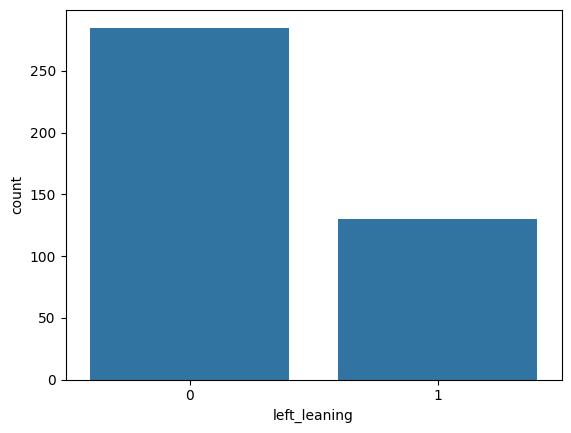

In [32]:
sns.countplot(data=df2, x="left_leaning")

<Axes: xlabel='year', ylabel='Count'>

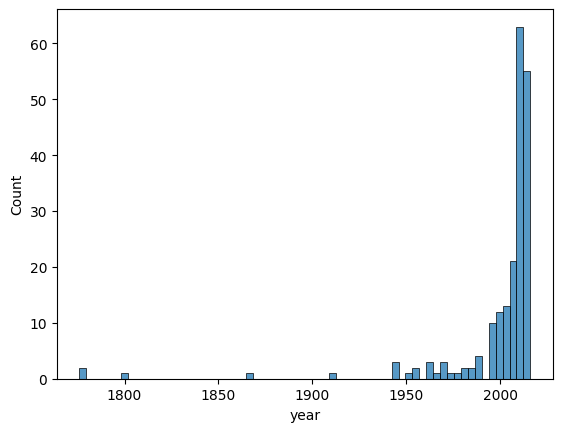

In [33]:
sns.histplot(data=df2, x="year")

<Axes: xlabel='left_leaning', ylabel='fan_count'>

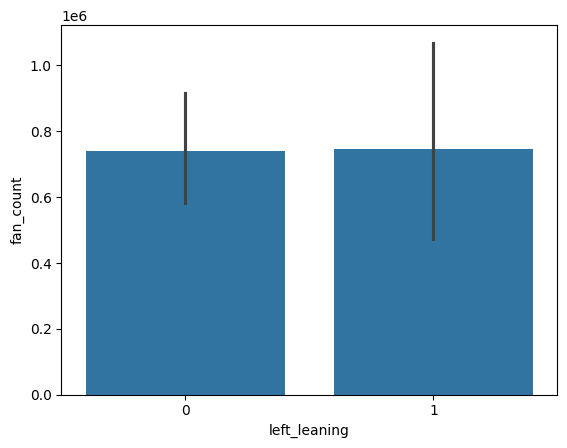

In [35]:
sns.barplot(data=df2, x="left_leaning", y="fan_count", errorbar=('ci', 95)) 